In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#June stats
def get_temps(month):
    results = session.query(Measurement.tobs, Station.station).\
        filter(func.extract('month', Measurement.date) == month)
    df = pd.DataFrame(results, columns = ['Data', 'Station'])
    return df.describe()

In [11]:
get_temps('06')

,Data
count,15300.000000
mean,74.944118
std,3.256565
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [12]:
from  sqlalchemy import extract

In [13]:
session.query(Measurement.date).filter(extract('month', Measurement.date)==6).all()

[('2010-06-01'),
 ('2010-06-02'),
 ('2010-06-03'),
 ('2010-06-04'),
 ('2010-06-05'),
 ('2010-06-06'),
 ('2010-06-07'),
 ('2010-06-08'),
 ('2010-06-09'),
 ('2010-06-10'),
 ('2010-06-11'),
 ('2010-06-12'),
 ('2010-06-13'),
 ('2010-06-14'),
 ('2010-06-15'),
 ('2010-06-16'),
 ('2010-06-17'),
 ('2010-06-18'),
 ('2010-06-19'),
 ('2010-06-20'),
 ('2010-06-21'),
 ('2010-06-22'),
 ('2010-06-23'),
 ('2010-06-24'),
 ('2010-06-25'),
 ('2010-06-26'),
 ('2010-06-27'),
 ('2010-06-28'),
 ('2010-06-29'),
 ('2010-06-30'),
 ('2011-06-01'),
 ('2011-06-02'),
 ('2011-06-03'),
 ('2011-06-04'),
 ('2011-06-05'),
 ('2011-06-06'),
 ('2011-06-07'),
 ('2011-06-08'),
 ('2011-06-09'),
 ('2011-06-10'),
 ('2011-06-11'),
 ('2011-06-12'),
 ('2011-06-13'),
 ('2011-06-14'),
 ('2011-06-15'),
 ('2011-06-17'),
 ('2011-06-18'),
 ('2011-06-19'),
 ('2011-06-20'),
 ('2011-06-21'),
 ('2011-06-24'),
 ('2011-06-25'),
 ('2011-06-26'),
 ('2011-06-27'),
 ('2011-06-28'),
 ('2011-06-29'),
 ('2012-06-01'),
 ('2012-06-02'),
 ('2012-06-03'

In [14]:
#now let's retrieve data and precipitation 

results = []

results = results = session.query(Measurement.date, Measurement.tobs)

In [15]:
result = results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [16]:
#we need a Df for June
june_df = pd.DataFrame(results, columns = ['date', 'temperature'])
june_df

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [17]:
#we need to sort this by date
june_df.set_index(june_df['date'], inplace = True)
june_df

,date,temperature
date,,
2010-06-01,2010-06-01,78.0
2010-06-02,2010-06-02,76.0
2010-06-03,2010-06-03,78.0
2010-06-04,2010-06-04,76.0
2010-06-05,2010-06-05,77.0
...,...,...
2017-06-26,2017-06-26,79.0
2017-06-27,2017-06-27,74.0
2017-06-28,2017-06-28,74.0


In [18]:
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


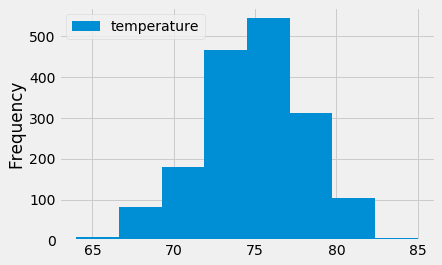

In [19]:
#let's make a histogram of the temps in June
june_df.plot.hist(bins = 8)
plt.show()

In [20]:
get_temps('12')

,Data
count,13653.000000
mean,71.041529
std,3.744822
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [21]:

session.query(Measurement.date).filter(extract('month', Measurement.date)==12).all()



[('2010-12-01'),
 ('2010-12-03'),
 ('2010-12-04'),
 ('2010-12-06'),
 ('2010-12-07'),
 ('2010-12-08'),
 ('2010-12-09'),
 ('2010-12-10'),
 ('2010-12-11'),
 ('2010-12-12'),
 ('2010-12-13'),
 ('2010-12-14'),
 ('2010-12-15'),
 ('2010-12-16'),
 ('2010-12-17'),
 ('2010-12-18'),
 ('2010-12-19'),
 ('2010-12-23'),
 ('2010-12-24'),
 ('2010-12-26'),
 ('2010-12-27'),
 ('2010-12-28'),
 ('2010-12-29'),
 ('2010-12-30'),
 ('2010-12-31'),
 ('2011-12-01'),
 ('2011-12-02'),
 ('2011-12-03'),
 ('2011-12-04'),
 ('2011-12-05'),
 ('2011-12-06'),
 ('2011-12-07'),
 ('2011-12-08'),
 ('2011-12-09'),
 ('2011-12-10'),
 ('2011-12-11'),
 ('2011-12-12'),
 ('2011-12-13'),
 ('2011-12-14'),
 ('2011-12-15'),
 ('2011-12-16'),
 ('2011-12-17'),
 ('2011-12-18'),
 ('2011-12-19'),
 ('2011-12-20'),
 ('2011-12-21'),
 ('2011-12-22'),
 ('2011-12-23'),
 ('2011-12-24'),
 ('2011-12-25'),
 ('2011-12-26'),
 ('2011-12-27'),
 ('2011-12-28'),
 ('2011-12-29'),
 ('2011-12-30'),
 ('2011-12-31'),
 ('2012-12-01'),
 ('2012-12-02'),
 ('2012-12-03'

In [22]:
#we need a Df for December
dec_df = pd.DataFrame(results, columns = ['date', 'temperature'])
dec_df

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [23]:
dec_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


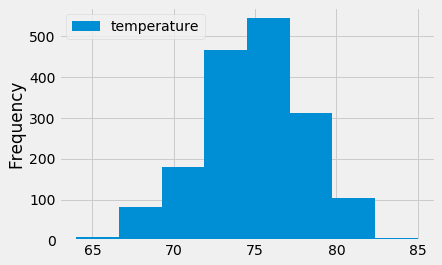

In [24]:
#let's make a histogram of the temps in December
dec_df.plot.hist(bins = 8)
plt.show()